# Zadanie 6 - bonusowe


Do realizacji tego zadania jest potrzebny dostęp do API Udemy. Niestety w czasie przewidzianym na realizację zadania nie uzyskałem swojego klucza do API (moja prośba cały czas oczekuje na rozpatrzenie). Z drugiej strony Udemy blokuje dostęp zewnętrznym skryptom, które starają się pozyskać dane na własną rękę.


Poniżej znajduje się lista czynności, które bym zrealizował, gdybym miał dostęp do API:
1. Utworzenie 'requesta' korzystając z metody GET courses-list.
2. Import wyniku w formacie JSON.
3. Utworzenie DataFrame za pomocą biblioteki pandas.
4. Eksploracja danych i wyciągnięcie informacji o ilości kursów.
5. Zgrupowanie wszystkich instruktorów i uszeregowanie pod względem liczby studentów.
6. Prezentacja i wizualizacja danych.


### Przykład


Postanowiłem skorzystać z przykładowego otwartego API, żeby pokazać na konkretnym przykładzie, jak rozwiązać tego typu zadanie. W tym wypadku posłużę się (bardzo fajnym) API firmy SpaceX, które zawiera wiele ciekawych informacji.

API jest dostępne na stronie: <https://docs.spacexdata.com/>



---


Korzystając z interfejsu SpaceX API ściągam plik JSON z danymi o wszystkich lotach rakiet i importuję dane do biblioteki pandas.

In [65]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
with open('spacex_launches.json') as f: 
    d = json.load(f) 

In [16]:
df = pd.read_json('spacex_launches.json', orient='columns')

In [95]:
df

,flight_number,mission_name,mission_id,upcoming,launch_year,launch_date_unix,launch_date_utc,launch_date_local,is_tentative,tentative_max_precision,...,static_fire_date_unix,timeline,crew,last_date_update,last_ll_launch_date,last_ll_update,last_wiki_launch_date,last_wiki_revision,last_wiki_update,launch_date_source
0,1,FalconSat,[],False,2006,1143239400,2006-03-24T22:30:00.000Z,2006-03-25T10:30:00+12:00,False,hour,...,1.142554e+09,{'webcast_liftoff': 54},None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,DemoSat,[],False,2007,1174439400,2007-03-21T01:10:00.000Z,2007-03-21T13:10:00+12:00,False,hour,...,NaN,{'webcast_liftoff': 60},None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Trailblazer,[],False,2008,1217648040,2008-08-02T03:34:00.000Z,2008-08-02T15:34:00+12:00,False,hour,...,NaN,{'webcast_liftoff': 14},None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,RatSat,[],False,2008,1222643700,2008-09-28T23:15:00.000Z,2008-09-28T11:15:00+12:00,False,hour,...,1.221869e+09,{'webcast_liftoff': 5},None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,RazakSat,[],False,2009,1247456100,2009-07-13T03:35:00.000Z,2009-07-13T15:35:00+12:00,False,hour,...,NaN,{'webcast_liftoff': 5},None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,104,CRS-21,[EE86F74],True,2020,1603152000,2020-10-20T00:00:00.000Z,2020-10-19T20:00:00-04:00,True,day,...,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103,105,GPS SV05,[],True,2020,1598918400,2020-09-01T00:00:00.000Z,2020-08-31T20:00:00-04:00,True,month,...,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,106,Turksat 5A,[],True,2020,1601510400,2020-10-01T00:00:00.000Z,2020-09-30T20:00:00-04:00,True,quarter,...,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,106,Smallsat SSO Rideshare 2 (Mission 9),[],True,2020,1601510400,2020-10-01T00:00:00.000Z,2020-09-30T17:00:00-07:00,True,month,...,NaN,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Całkowita liczba lotów SpaceX (łącznie z zaplanowanymi): **107**

Liczba lotów do końca 2019: **86**



Poniżej znajduje się rozkład lotów na każdy rok:

In [94]:
flights = df.groupby('launch_year')[['flight_number']].count()
flights

,flight_number
launch_year,
2006,1
2007,1
2008,2
2009,1
2010,2
2012,2
2013,3
2014,6
2015,7


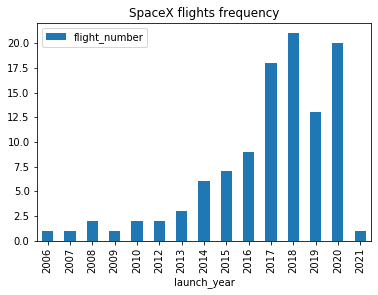

In [49]:
flights.plot(kind='bar', title='SpaceX flights frequency')

Możemy też szybko sprawdzić, ile lotów zakończyło się sukcesem (wartość 1.0)

In [89]:
success = df.groupby('launch_success')[['flight_number']].count()
success

,flight_number
launch_success,
0.0,5
1.0,85


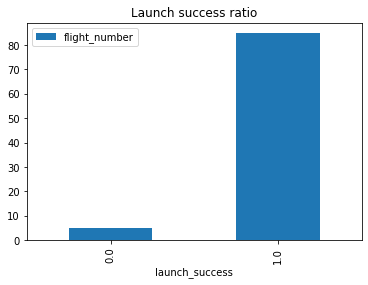

In [90]:
success.plot(kind='bar', title='Launch success ratio')

Na koniec sprawdzamy, jakie typy rakiet zostały wystrzelone:

In [73]:
x = pd.json_normalize(df['rocket'])
rockets = x.groupby('rocket_name')[['rocket_name']].count()
rockets

,rocket_name
rocket_name,
Falcon 1,5
Falcon 9,99
Falcon Heavy,3
